In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns
from scipy.signal import savgol_filter
%matplotlib inline

In [3]:
fia_wec_data = pd.read_csv("2012-2022_FIA_WEC_FULL_LAP_DATA.csv", index_col = 0)

c:\Users\trist\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (26,29,30,31,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
fia_wec_data.season = fia_wec_data.season.map(str)
fia_wec_data

,number,driver_number,lap_number,lap_time,lap_improvement,crossing_finish_line_in_pit,s1,s1_improvement,s2,s2_improvement,...,team_stint_no,team_stint,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap
0,57.0,1.0,1.0,2:23.141,0.0,NaN,52.533,0.0,45.335,0.0,...,1,Krohn Racing #57 Stint #1,143141,20.0,1.0,349.0,0.349,26.922,0.000,0.000
1,88.0,2.0,1.0,2:24.016,0.0,NaN,52.915,0.0,45.342,0.0,...,1,Team Felbermayr-Proton #88 Stint #1,144016,21.0,2.0,875.0,0.875,27.797,0.875,0.875
2,50.0,2.0,1.0,2:25.278,0.0,NaN,53.568,0.0,45.577,0.0,...,1,Larbre Competition #50 Stint #1,145278,22.0,3.0,1262.0,1.262,29.059,1.262,2.137
3,70.0,2.0,1.0,2:25.548,0.0,NaN,53.938,0.0,45.614,0.0,...,1,Larbre Competition #70 Stint #1,145548,23.0,4.0,270.0,0.270,29.329,0.270,2.407
4,61.0,2.0,1.0,2:25.859,0.0,NaN,54.482,0.0,45.816,0.0,...,1,AF Corse-Waltrip #61 Stint #1,145859,24.0,5.0,311.0,0.311,29.640,0.311,2.718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483173,31.0,3.0,103.0,2:10.406,0.0,NaN,37.172,0.0,1:00.085,0.0,...,8,WRT #31 Stint #8,21697237,3.0,1.0,38712.0,38.712,66.185,0.000,0.000
483174,41.0,2.0,103.0,2:10.761,0.0,NaN,36.841,0.0,1:00.085,0.0,...,8,Realteam by WRT #41 Stint #8,21731728,4.0,2.0,34491.0,34.491,100.676,34.491,34.491
483175,38.0,3.0,103.0,2:10.164,0.0,NaN,36.517,0.0,59.479,0.0,...,8,JOTA #38 Stint #8,21739623,5.0,3.0,7895.0,7.895,108.571,7.895,42.386
483176,5.0,3.0,103.0,2:10.573,0.0,NaN,36.975,0.0,59.739,0.0,...,7,Team Penske #5 Stint #7,21748662,6.0,4.0,9039.0,9.039,117.610,9.039,51.425


In [106]:
# build dashboard for avg lap times within 107% times

#selector for year
fia_wec_data_filtered = fia_wec_data[fia_wec_data['season'] == '2016']
#selector for round
fia_wec_data_filtered = fia_wec_data_filtered[fia_wec_data_filtered['round'] == 3]
#selector for class
fia_wec_data_filtered = fia_wec_data_filtered[fia_wec_data_filtered['class'] == "LMP2"]
#selector for team, if -1, we pull all teams
team = -1
if team != -1:
    fia_wec_data_filtered = fia_wec_data_filtered[fia_wec_data_filtered['number'] == team]
cutoff_time = fia_wec_data_filtered['lap_time_ms'].min()*1.1
fia_wec_data_with_cutoff = fia_wec_data_filtered[fia_wec_data_filtered['lap_time_ms'] < cutoff_time]

Text(0, 0.5, 'Lap Time (s)')

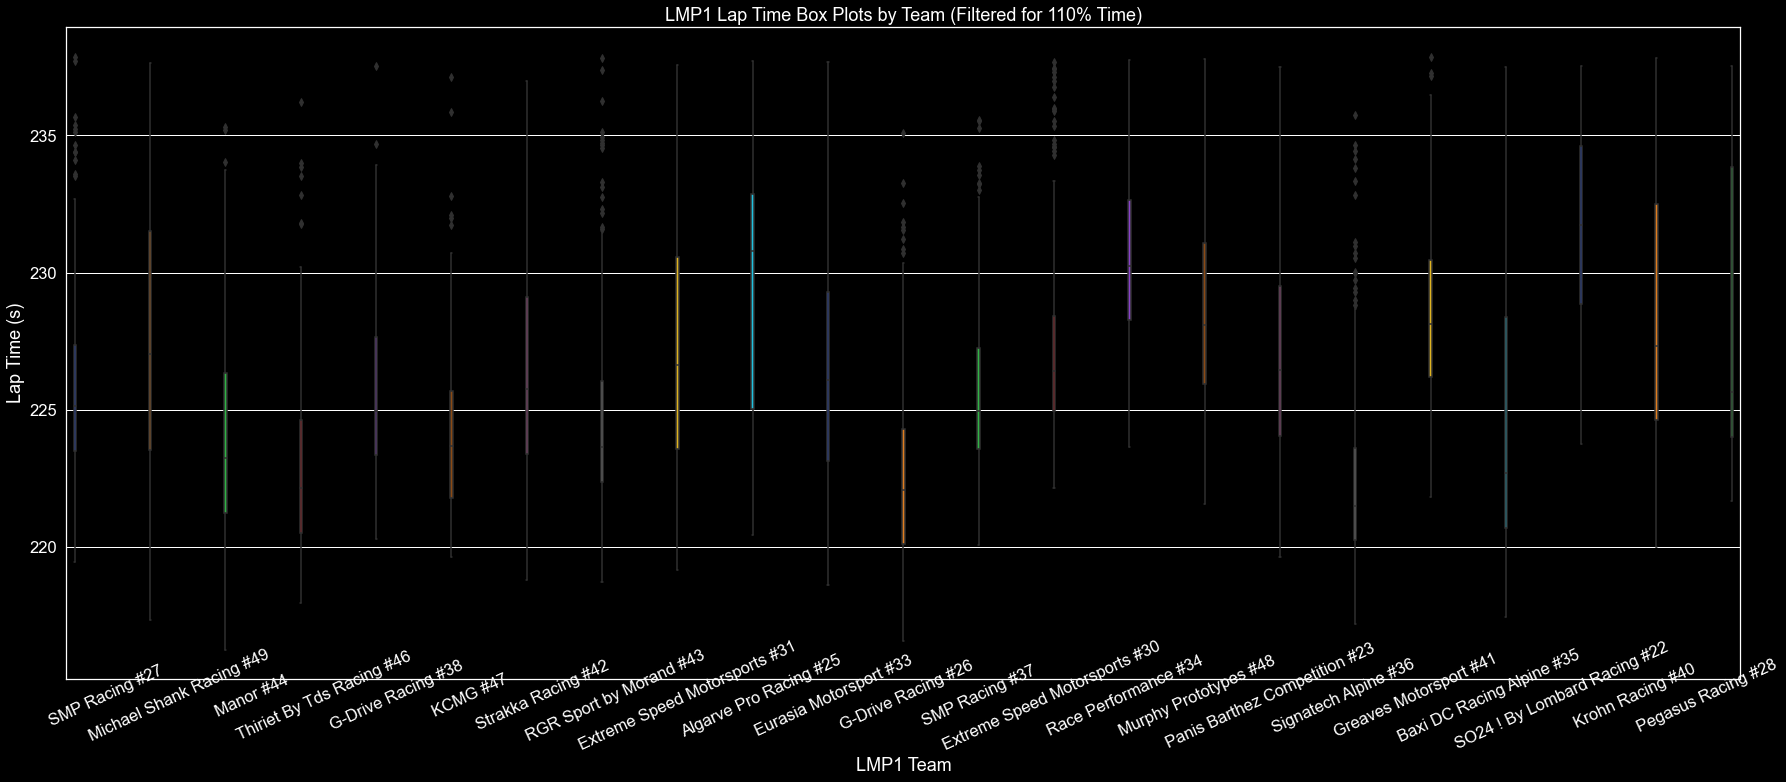

In [107]:
fia_wec_data_filtered
sns.set(font_scale = 1.5, rc={'figure.figsize':(30,12)})
plt.style.use('dark_background')
ax = sns.boxplot(data=  fia_wec_data_with_cutoff, y = 'lap_time_s', x = 'team_no', palette= "bright", hue = 'team_no')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 25,wrap = True)
ax.set_title("LMP1 Lap Time Box Plots by Team (Filtered for 110% Time)")
ax.set_xlabel("LMP1 Team")
ax.get_legend().remove()
ax.set_ylabel("Lap Time (s)")

In [110]:
fia_wec_data_filtered['elapsed_s'] = fia_wec_data_filtered['elapsed_ms']/1000

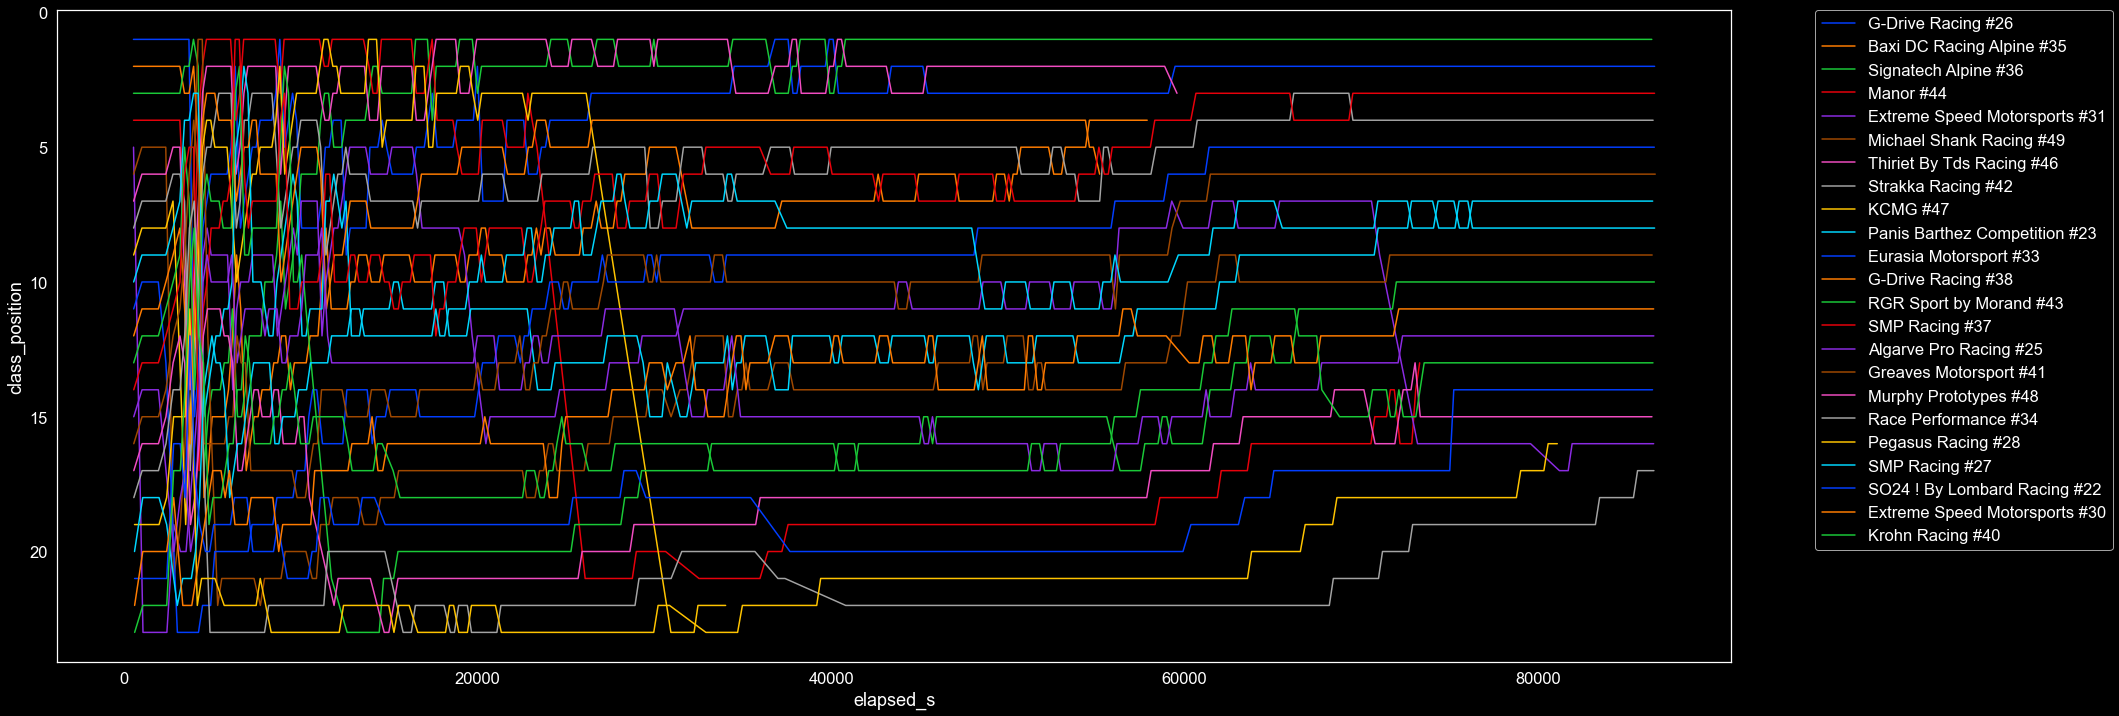

In [118]:
ax2 = sns.lineplot(data = fia_wec_data_filtered_last_4_hrs, x = 'elapsed_s', y = 'class_position', palette = 'bright', hue = 'team_no')
ax2.grid(False)
ax2.invert_yaxis()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)